In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [8]:
# 讀取所有圖片的檔案名稱
img_dir = './pokemon6'  # pokemon 資料夾路徑
img_names = os.listdir(img_dir)

In [9]:
import tensorflow as tf
print(len(img_names)) #img_names is list
#print(img_names[1])
#print(img_names[1][0:4])
label = [] #one-hot編碼
#for num_img in range(len(img_names)) :
#  if(img_names[num_img][0]!='0') :
#    label.append(str((int(img_names[num_img][0:4])-1)))
#  elif(img_names[num_img][1]!='0') :
#    label.append(str((int(img_names[num_img][1:4])-1)))
#  elif(img_names[num_img][2]!='0') :
#    label.append(str((int(img_names[num_img][2:4])-1)))
#  elif(img_names[num_img][3]!='0') :
#    label.append(str((int(img_names[num_img][3:4])-1)))
#  else :
#    label.append(str((int(img_names[num_img][4])-1)))
for num_img in range(len(img_names)) :
    if(img_names[num_img][1]=='_') :
        label.append(str((int(img_names[num_img][0])-1)))
    else :
        label.append(str((int(img_names[num_img][0:2])-1)))
labels = tf.keras.utils.to_categorical(label, num_classes=27)

27000


In [10]:
import os
from sklearn.model_selection import train_test_split

# 定義讀取和處理圖片的函數
def load_and_process_image(filepath):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32) / 255.0
    return image

# 獲取所有圖片文件的路徑
filepaths = [os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if fname.endswith('.png')]

# 使用 train_test_split 分割數據集
filepaths_train, filepaths_test,  labels_train, labels_test  = train_test_split(filepaths, labels, test_size=0.2, random_state=1)
filepaths_train, filepaths_valid, labels_train,  labels_valid = train_test_split(filepaths_train, labels_train, test_size=0.2, random_state=1)
# 將訓練和測試數據轉換為 tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((filepaths_train, labels_train))
train_dataset = train_dataset.map(lambda filepath, label: (load_and_process_image(filepath), label))

valid_dataset = tf.data.Dataset.from_tensor_slices((filepaths_valid, labels_valid))
valid_dataset = valid_dataset.map(lambda filepath, label: (load_and_process_image(filepath), label))

test_dataset = tf.data.Dataset.from_tensor_slices((filepaths_test, labels_test))
test_dataset = test_dataset.map(lambda filepath, label: (load_and_process_image(filepath), label))

# 設定批次大小和緩存
batch_size  = 32
train_dataset = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_dataset = valid_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [15]:
# 定義一個簡單的CNN模型
# from tensorflow.keras import layers, models
# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), padding="same",activation='relu', input_shape=(256, 256, 3)),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
#     layers.BatchNormalization(),
#     layers.Conv2D(128, (3, 3), padding="same", activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
#     layers.BatchNormalization(),
#     layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(150, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(100, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(27, activation='softmax')
# ])
from tensorflow.keras import layers, models
model = models.Sequential([
   layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
   layers.Dropout(0.3),
   layers.MaxPooling2D((2, 2)),
   layers.Conv2D(64, (3, 3), activation='relu'),
   layers.Dropout(0.3),
   layers.MaxPooling2D((2, 2)),
   layers.Conv2D(128, (3, 3), activation='relu'),
   layers.Dropout(0.3),
   layers.MaxPooling2D((2, 2)),
   layers.Flatten(),
   layers.Dense(128, activation='relu'),
   layers.Dropout(0.3),
   layers.Dense(27, activation='softmax')
])
from keras.models import load_model
#model = load_model('model.h5')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,842,459 (56.62 MB)

 Trainable params: 14,842,459 (56.62 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
## 編譯模型
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])
#
## 訓練模型
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)  #根據需要調整 epochs 數量

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 226s 417ms/step - accuracy: 0.5232 - loss: 1.6568 - val_accuracy: 0.9616 - val_loss: 0.2421
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 237s 440ms/step - accuracy: 0.9519 - loss: 0.1494 - val_accuracy: 0.9963 - val_loss: 0.0826
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 236s 437ms/step - accuracy: 0.9776 - loss: 0.0759 - val_accuracy: 0.9963 - val_loss: 0.0519
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 240s 443ms/step - accuracy: 0.9646 - loss: 0.1288 - val_accuracy: 0.9993 - val_loss: 0.0114
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 238s 440ms/step - accuracy: 0.9929 - loss: 0.0219 - val_accuracy: 0.9896 - val_loss: 0.1075
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 237s 438ms/step - accuracy: 0.9840 - loss: 0.0533 - val_accuracy: 0.9998 - val_loss: 0.0077
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 240s 444ms/step - accuracy: 0.9836 - loss: 0.0548 - val_accuracy: 0.9995 - val_loss: 0.0076
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 239s 442ms/step - accuracy: 0.9915 -

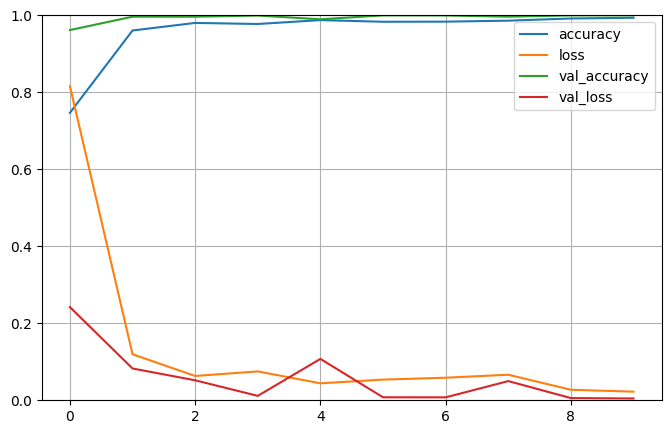

In [17]:
## Learning curves

import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
## Model evaluation by test set
model.evaluate(valid_dataset)
model.evaluate(train_dataset)
model.evaluate(test_dataset)

135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9999 - loss: 0.0045
540/540 ━━━━━━━━━━━━━━━━━━━━ 46s 86ms/step - accuracy: 1.0000 - loss: 0.0032
169/169 ━━━━━━━━━━━━━━━━━━━━ 16s 92ms/step - accuracy: 0.9994 - loss: 0.0055


[0.00588242756202817, 0.9994444251060486]

In [20]:
model.save('modelcheng.h5')